1 .Importing the Dataset using URL


In [1]:
#importing the Dataset
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x1cd53905c70>)

2. Loading the Dataset


In [2]:
#Saving the dataset
import pandas as pd
german_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 
                        delimiter=' ',header=None)

In [3]:
#Displaying the original dataset
german_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
#from the document file of german, now we will name the columns
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']
german_df= german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])


In [6]:
german_df.head(5)

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,1
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,2
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,1
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,1
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,2


In [7]:
# checking for missing values
german_df.isna().any().any()

False

3 .lets  do the analysis of data and visualize it

In [12]:
# import libraries for visualizations

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

lets understand the distribution

In [15]:
# let us look at the target column which is 'target' to understand how the data is distributed
german_df.groupby(["target"]).count()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign
target,,,,,,,,,,,,,,,,,,,,
1,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
2,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300


In above column we checked the distribution based on the target(1,2).Because according to the document file provided it is said that :
1: Good credit score(loan can be approved)
2: Bad credit score (Loan can not be approved)

<AxesSubplot:xlabel='target', ylabel='count'>

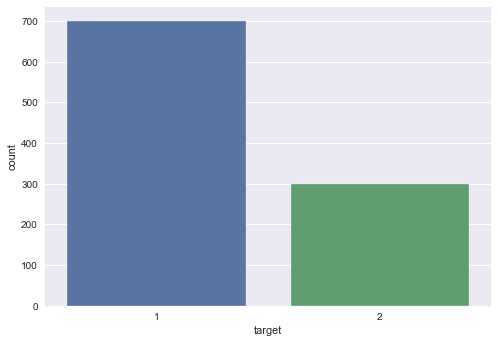

In [140]:
import seaborn as sns
sns.countplot(x='target', data=german_df) 

In [16]:
#Adjusting the range of some variables
german_df[['credit_amount','duration','age']].describe()


,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [18]:
import numpy as np
german_df['credit_amount']=np.log(german_df['credit_amount'])
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


Understaning the relationship between the credit amount and repayment duration using scatter plot

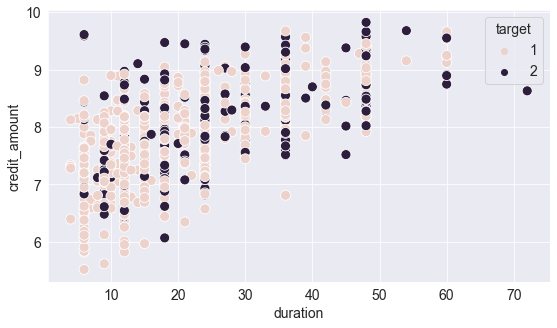

In [19]:
sns.scatterplot(y=german_df.credit_amount, 
                x=german_df.duration, 
                hue=german_df.target, 
                s=100, 
                );

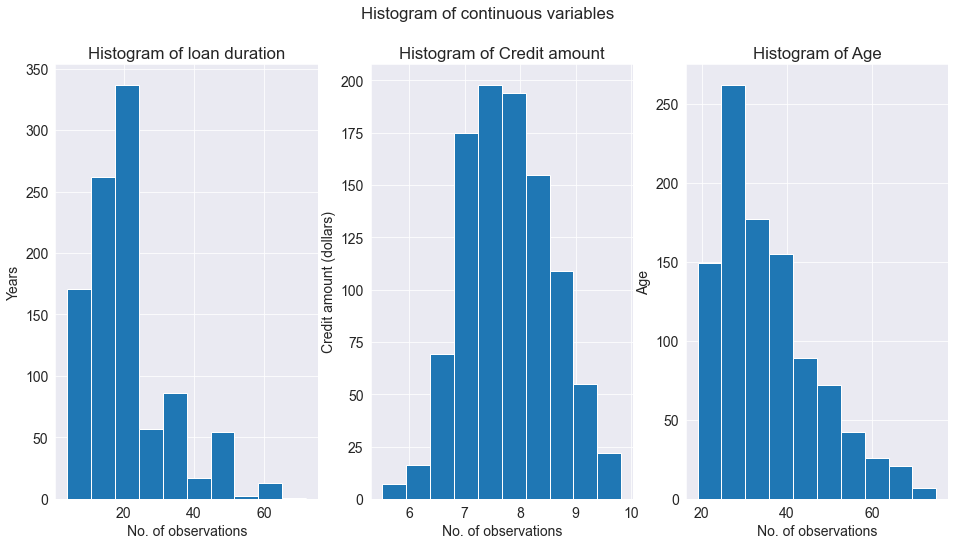

In [20]:
# plotting histograms

fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(german_df['duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(german_df['credit_amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount (dollars)')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(german_df['age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of Age');

 4 . Now we will endocode the catagorical valiables
     a:Lbael encoding for the valiables whose values lie in range of 2
     b:Hot enocoding for the valriables whose values lie in the range of more than two

In [21]:
# Number of unique classes in each object column
german_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

account_bal             3
payment_status          5
purpose                10
savings_bond_value      5
employed_since          5
sex_marital             4
guarantor               3
most_valuable_asset     4
concurrent_credits      3
type_of_housing         3
job                     3
telephon                2
foreign                 2
dtype: int64

In [22]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in german_df:
    if german_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(german_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(german_df[col])
            # Transform both training and testing data
            german_df[col] = le.transform(german_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [23]:
#one-hot encoding of categorical variables
german_df = pd.get_dummies(german_df)

print('Encoded Features shape: ', german_df.shape)

Encoded Features shape:  (1000, 58)


Finding the correlation between the variables

In [24]:
# Find correlations with the target and sort
correlations = german_df.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 sex_marital_A92                    0.075493
type_of_housing_A153               0.081556
account_bal_positive_bal           0.089895
type_of_housing_A151               0.092785
concurrent_credits_A141            0.096510
purpose_A40                        0.096900
employed_since_A72                 0.106397
credit_amount                      0.109570
most_valuable_asset_real_estate    0.125750
payment_status_A31                 0.134448
payment_status_A30                 0.144767
savings_bond_value_A61             0.161007
duration                           0.214927
account_bal_neg_bal                0.258333
target                             1.000000
Name: target, dtype: float64

Most Negative Correlations:
 account_bal_no_acc         -0.322436
payment_status_A34         -0.181713
type_of_housing_A152       -0.134589
savings_bond_value_A65     -0.129238
most_valuable_asset_none   -0.119300
concurrent_credits_A143    -0.113285
purpose_A43                -0.

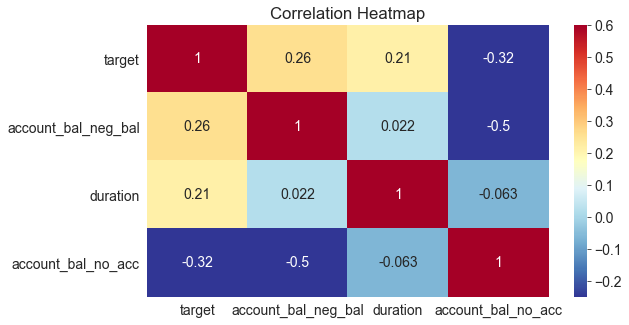

In [26]:
#Extract the significantly correlated variables
corr_data = german_df[['target', 'account_bal_neg_bal','duration','account_bal_no_acc']]
corr_data_corrs = corr_data.corr()


# Heatmap of correlations
sns.heatmap(corr_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Data split to train and test datasets

In [28]:
from sklearn.model_selection import train_test_split
x, y = german_df.drop('target', axis=1), german_df['target']
x.shape, y.shape


((1000, 57), (1000,))

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=42)


In [30]:
x_train.shape, x_test.shape

((800, 57), (200, 57))

In [32]:
# Let's normalize the features to prevent undue influence in the model.

from sklearn.preprocessing import MinMaxScaler

# scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# fit on features dataset
scaler.fit(x_train)
scaler.fit(x_test)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

Training the models 

1. using Decision tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
# initialize a tree
tree= DecisionTreeClassifier(random_state=42)
# fit model
tree.fit(x_train, y_train)
# predict
pred_test= tree.predict(x_test)
pred_test.shape, y_test.shape

((200,), (200,))

lets check accuracy of the predicted data


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
accuracy_score(y_test, pred_test)

0.71

In [46]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred_test))

[[113  28]
 [ 30  29]]


In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_test, average='micro')

0.7100000000000001

2.Using logistics Regression model


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, recall_score, classification_report
tuned_models_test=[]
tuned_models_train=[]

# Create the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=42)

# Train on the training data
log_reg.fit(x_train, y_train)

# Evaluate on test dataset
pred_test= log_reg.predict(x_test)


In [53]:
accuracy_score(y_test, pred_test)

0.705

In [54]:
print(metrics.confusion_matrix(y_test,pred_test))


[[141   0]
 [ 59   0]]


In [55]:
f1_score(y_test, pred_test, average='micro')

0.705

using knn model

In [96]:
from sklearn.neighbors import KNeighborsClassifier
#Training the knn model
knn= KNeighborsClassifier(n_neighbors = 6)
# Train on the training data
knn.fit(x_train, y_train)
# Evaluate on test dataset
pred_test= knn.predict(x_test)


In [97]:
accuracy_score(y_test, pred_test)

0.74

In [98]:
print(metrics.confusion_matrix(y_test,pred_test))


[[137   4]
 [ 48  11]]


In [100]:
f1_score(y_test, pred_test)*100

84.04907975460122

using support vector classifier

In [115]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.8, gamma=10,random_state=42,probability = True).fit(x_train, y_train)
# Evaluate on test dataset
pred_test= svc.predict(x_test)


In [116]:
accuracy_score(y_test, pred_test)

0.775

In [117]:
print(metrics.confusion_matrix(y_test,pred_test))

[[126  15]
 [ 30  29]]


In [118]:
f1_score(y_test, pred_test)*100

84.84848484848484

deriving the curve


In [131]:
#prediction probabilities
r_probs=[0 for _ in range(len(y_test)) ]
rf_probs = svc.predict_proba(x_test)


In [132]:
rf_probs = rf_probs[:,1]

In [127]:
from sklearn.metrics import roc_curve,roc_auc_score


In [134]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print(rf_auc)


0.8041831950955644


In [152]:
r_fpr,r_tpr, _ = roc_curve(y_test,r_probs,pos_label = 2)
rf_fpr,rf_tpr, _ = roc_curve(y_test,rf_probs, pos_label = 2)

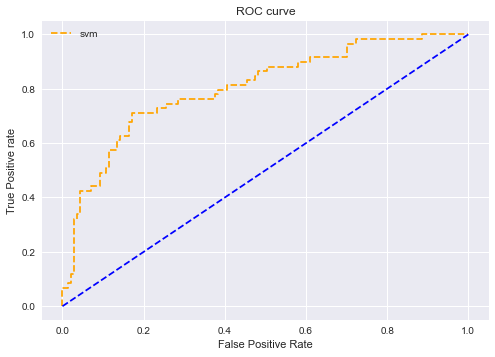

In [153]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(rf_fpr, rf_tpr, linestyle='--',color='orange', label='svm')

plt.plot(r_fpr, r_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();